In [1]:
# Preprocessing
import cv2
import numpy as np
import os
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [2]:
def preprocess(path, img, output_dir):
    """Binarize and remove background
    
    Parameters
    ----------
    img : arr
        Image data
    
    Returns
    -------
    thresh_img : arr
        Processed image
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # read in image
    img_path = path+img
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # Remove noise with bilateral filter (effective in noise removal while keeping edges sharp)
    gray_img_filt = cv2.bilateralFilter(gray_img, d=7, sigmaColor=75, sigmaSpace=75)
    # Remove shadows from image  by blurring image and subtracting from non-blurred image
    dilated_img = cv2.dilate(gray_img_filt, kernel=np.ones((20, 20), np.uint8))
    blur_img = cv2.medianBlur(dilated_img, ksize=21)
    diff_img = 255 - cv2.absdiff(gray_img_filt, blur_img)
    thresh_val = 0
    max_value = 255
    # Apply Otsu Binarization, which searches for a threshold based on the local minima in a
    # bi-modal histogram
    ret, thresh_img = cv2.threshold(diff_img, thresh=thresh_val, maxval=max_value, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.axis('off')
    plt.imshow(thresh_img, cmap='Greys_r')
    #plt.imshow(thresh_img)
    # plt.show()
    
    # save image
    save_filename = output_dir+file
    cv2.imwrite(save_filename, thresh_img) 

100%|██████████| 157/157 [00:00<00:00, 246.53it/s]


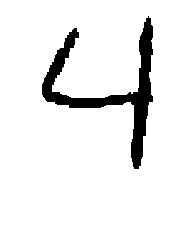

In [4]:
png_dir = '/Users/utoarca/Documents/Pearson_AI/gan_data/synthetic_with_color/with_backgrounds/'
png_dir_out = '/Users/utoarca/Documents/Pearson_AI/gan_data/synthetic_with_color/preprocessed/'
    # paths = [{'in_': train_path_input, 'out_': output_dir_train_input}, 
    #          {'in_': train_path_real, 'out_':output_dir_train_real,
    #          {'in_': test_path_input, 'out_': output_dir_test_input}, 
    #          {'in_': test_path_real, 'out_': output_dir_test_real}]

paths = [{'in_': png_dir, 'out_': png_dir_out}]
        
for num in range(0, len(paths)):
    # print(paths[num])
    for file in tqdm(os.listdir(paths[num]['in_'])):
        # print(file)
        preprocess(paths[num]['in_'], file, paths[num]['out_'])